### Task of this notebook:
#### Plot a chart where x-axis (X) and y-axis (Y) as:  
X: number of relevant documents at rank i / number of relevant documents in top n  
Y: number of irrelevant documents at rank i / number of irrilevant documents in top n  
where; i is the rank from 1 to n  


In [2]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_results(filename):
    results = pd.read_csv(filename, sep=';', index_col=0)
    sampled_results = results[results['PF'] != '  ']
    sampled_results['P'] = np.array(sampled_results['PF'], dtype=np.float)
    sampled_results['R'] = np.array(sampled_results['RM'], dtype=np.float)
    sampled_results['Score'] = (sampled_results['P'] + sampled_results['R'] )/ 2.0
    return sampled_results
sampled_qbe_results = read_results('annotations/SSbE.csv')
sampled_mlt_results = read_results('annotations/MLT.csv')
sampled_qbe_results = sampled_qbe_results[:100]
print 'number of SSbE samples',len(sampled_qbe_results)
print 'number of MLT samples',len(sampled_mlt_results)
sampled_mlt_results[:10]

number of SSbE samples 100
number of MLT samples 100


/home/dell/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dell/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dell/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

,Articles,PF,RM,P,R,Score
Rank,,,,,,
1,https://api.istex.fr/document/21DF3DF37766A07B...,1,1,1.0,1.0,1.00
2,https://api.istex.fr/document/B1BEB7E400969A2E...,1,0.5,1.0,0.5,0.75
3,https://api.istex.fr/document/8A14A0D5DEEA9D91...,0.5,0,0.5,0.0,0.25
4,https://api.istex.fr/document/C7885D97D873FDDA...,1,0.5,1.0,0.5,0.75
5,https://api.istex.fr/document/7059E3071A87DC69...,0,0,0.0,0.0,0.00
7,https://api.istex.fr/document/9D962699AE087CE8...,0,0.5,0.0,0.5,0.25
11,https://api.istex.fr/document/48E3EEF95715F9F6...,0,0,0.0,0.0,0.00
15,https://api.istex.fr/document/49C6E1158DA37F86...,0,0,0.0,0.0,0.00
16,https://api.istex.fr/document/0C72D5F906D2D681...,0,0,0.0,0.0,0.00


In [4]:
def accuracy_score (sample_results, topn):
    score = np.array(sample_results.head(topn+1))
    evaulation = np.sum(score) / (topn+1)
    return evaulation

def roc_score (sample_results, topn):
    score = np.array(sample_results.head(topn))
    evaulation = np.sum(score) / np.sum(sample_results)
    return evaulation

def roc_score_y (sample_results, topn):
    score = np.array(1 - sample_results.head(topn))
    evaulation = np.sum(score) / np.sum( 1 - sample_results)
    return evaulation

def build_curves(sampled_results):
    n = len(sampled_results)
    score_curve = np.arange(n, dtype=np.float)
    for i in range(n):
        score_curve[i] = accuracy_score (sampled_results['Score'], i)

    patric_curve = np.arange(n, dtype=np.float)
    for i in range(n):
        patric_curve[i] = accuracy_score (sampled_results['P'], i)

    rafael_curve = np.arange(n, dtype=np.float)
    for i in range(n):
        rafael_curve[i] = accuracy_score (sampled_results['R'], i)

    roc_curve_x = np.arange(n, dtype=np.float)
    for i in range(n):
        roc_curve_x[i] = roc_score(sampled_results['Score'], i)

    roc_curve_y = np.arange(n, dtype=np.float)
    for i in range(n):
        roc_curve_y[i] = roc_score_y(sampled_results['Score'], i)
    return score_curve, patric_curve, rafael_curve, roc_curve_x, roc_curve_y

qbe_score_curve, qbe_patric_curve, qbe_rafael_curve, qbe_roc_curve_x, qbe_roc_curve_y = build_curves(sampled_qbe_results)
mlt_score_curve, mlt_patric_curve, mlt_rafael_curve, mlt_roc_curve_x, mlt_roc_curve_y = build_curves(sampled_mlt_results)

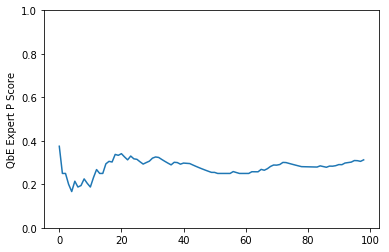

Mean: 0.283851699567
Last: 0.3125


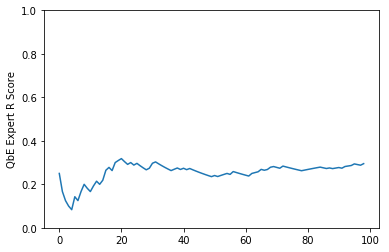

Mean: 0.258289645225
Last: 0.295


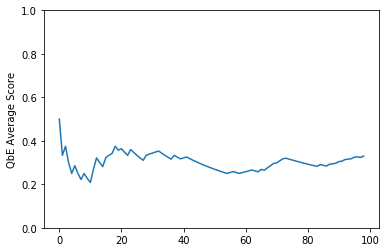

Mean: 0.309413753908
Last: 0.33


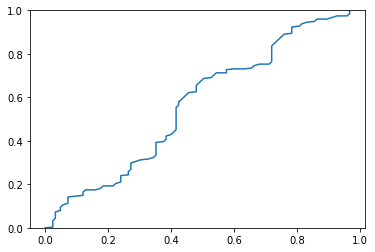

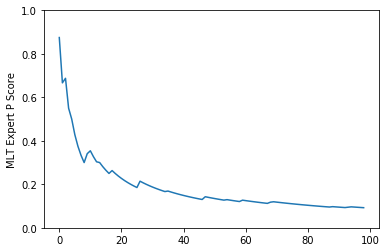

Mean: 0.194268752825
Last: 0.0925


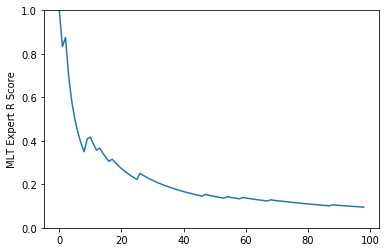

Mean: 0.221819090347
Last: 0.095


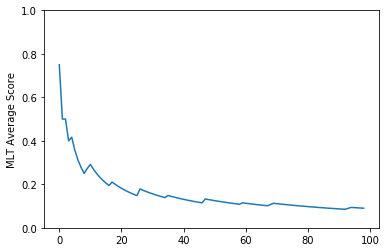

Mean: 0.166718415302
Last: 0.09


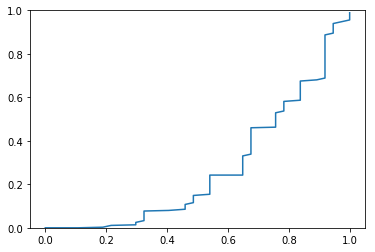

In [5]:
def plotit(curve, label):
    plt.ylim(0,1)
    plt.ylabel(label)
    plt.plot(curve[1:])
    plt.show()
    print 'Mean:', np.average(curve)
    print 'Last:', curve[-1]
    
def plotroc(method, curve, curve_y):
    plt.ylim(0,1)
    plt.plot(curve, curve_y)
    plt.title = method+'ROC curve'
    plt.show()

def plot_all(method, patric_curve, rafael_curve, score_curve, roc_curve_x, roc_curve_y):
    plotit(patric_curve, method+' Expert P Score')
    plotit(rafael_curve, method+' Expert R Score')
    plotit(score_curve, method+' Average Score')
    plotroc(method, roc_curve_x, roc_curve_y)

plot_all('QbE', qbe_score_curve, qbe_patric_curve, qbe_rafael_curve, qbe_roc_curve_x, qbe_roc_curve_y)
plot_all('MLT', mlt_score_curve, mlt_patric_curve, mlt_rafael_curve, mlt_roc_curve_x, mlt_roc_curve_y)

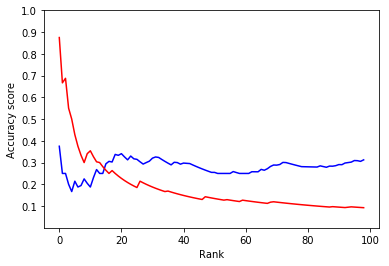

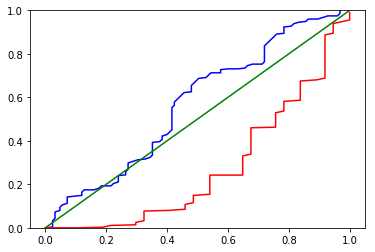

In [6]:
def plotit2(curve, curve2):
    plt.ylim(0,1)
    plt.ylabel('Accuracy score')
    plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.xlabel('Rank')
    plt.plot(curve[1:],'b')
    plt.plot(curve2[1:], 'r')
    plt.show()

def plotroc2( curve, curve_y, curve2, curve_y2):
    plt.ylim(0,1)
    plt.plot(curve, curve_y, 'b')
    plt.plot(curve2, curve_y2,'r')
    plt.plot(line1, line2,'g')
    plt.title = 'ROC curve'
    plt.show()
    
line1 = (np.arange(100)+1)/100.0
line2 = (np.arange(100)+1)/100.0
plotit2(qbe_score_curve, mlt_score_curve)

line1 = (np.arange(101))/100.0
line2 = (np.arange(101))/100.0
plotroc2( qbe_roc_curve_x, qbe_roc_curve_y, mlt_roc_curve_x, mlt_roc_curve_y)

In [7]:
print 'histogram of our model'
p = sampled_qbe_results['P']
unique, counts = np.unique(p, return_counts=True)
#print np.asarray((unique, counts))

r = sampled_qbe_results['R']
unique, counts = np.unique(r, return_counts=True)
#print np.asarray((unique, counts))

r = sampled_qbe_results['Score']
unique, counts = np.unique(r, return_counts=True)
print np.asarray((unique, counts))

print 'histogram of MLT model'
p = sampled_mlt_results['P']
unique, counts = np.unique(p, return_counts=True)
#print np.asarray((unique, counts))

r = sampled_mlt_results['R']
unique, counts = np.unique(r, return_counts=True)
#print np.asarray((unique, counts))

r = sampled_mlt_results['Score']
unique, counts = np.unique(r, return_counts=True)
print np.asarray((unique, counts))

histogram of our model
[[  0.     0.25   0.5    0.75   1.  ]
 [ 37.    30.    12.    13.     8.  ]]
histogram of MLT model
[[  0.     0.25   0.5    0.75   1.  ]
 [ 81.     9.     4.     4.     2.  ]]


In [8]:
x = sampled_qbe_results[['P','R']]
unique, counts = np.unique(x, return_counts=True)
print np.asarray((unique, counts)).T

y = sampled_mlt_results[['P','R']]
unique, counts = np.unique(y, return_counts=True)
print np.asarray((unique, counts)).T

[[   0.   106. ]
 [   0.5   63. ]
 [   1.    31. ]]
[[   0.   171. ]
 [   0.5   21. ]
 [   1.     8. ]]


In [9]:
qbe_confusion_mat = confusion_matrix(np.array(sampled_qbe_results['P'], dtype=np.str), np.array(sampled_qbe_results['R'],dtype=np.str), labels=['1.0','0.5','0.0'])
print 'number of articles', np.sum(qbe_confusion_mat)
qbe_confusion_mat

number of articles 100


array([[ 8,  3,  0],
       [10, 10, 17],
       [ 2, 13, 37]])

In [10]:
mlt_confusion_mat = confusion_matrix(np.array(sampled_mlt_results['P'], dtype=np.str), np.array(sampled_mlt_results['R'],dtype=np.str), labels=['1.0','0.5','0.0'])
print 'number of articles', np.sum(mlt_confusion_mat)
mlt_confusion_mat

number of articles 100


array([[ 2,  3,  0],
       [ 1,  4,  4],
       [ 0,  5, 81]])

In [11]:
print 'percentage confusion matrix of QbE'
nb_qbe = float(np.sum(qbe_confusion_mat))
qbe_percent_mat = np.around(qbe_confusion_mat/nb_qbe, 2)
print qbe_percent_mat

print 'percentage confusion matrix of MLT'
nb_mlt = float(np.sum(mlt_confusion_mat))
mlt_percent_mat = np.around(mlt_confusion_mat/nb_mlt, 2)
print mlt_percent_mat

percentage confusion matrix of QbE
[[ 0.08  0.03  0.  ]
 [ 0.1   0.1   0.17]
 [ 0.02  0.13  0.37]]
percentage confusion matrix of MLT
[[ 0.02  0.03  0.  ]
 [ 0.01  0.04  0.04]
 [ 0.    0.05  0.81]]
